<a href="https://colab.research.google.com/github/sezinbiner/ML-Project/blob/prediction-models/commented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/carsSon.xlsx", index_col=0)        #dataset okunur.
from sklearn.utils import shuffle                                             
df = shuffle(df)

In [64]:
from sklearn.preprocessing import OrdinalEncoder                            
enc = OrdinalEncoder()                                                       #kategorik değişkenler nümerik hale getirilir.
df[["Fiyat Aralık","Marka","Model", "Şanzıman Türü", "Yakıt Türü","Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi"]] = enc.fit_transform(df[["Fiyat Aralık","Marka","Model", "Şanzıman Türü", "Yakıt Türü","Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi"]])


In [65]:
df.head(50)

,Fiyat Aralık,Marka,Model,Model Yılı,Km,Şanzıman Türü,Yakıt Türü,Renk,Motor Gücü,Silindir Hacmi,Ağırlık,Kasa Cins Tipi,Araç Cinsi,Araç Tipi
Id,,,,,,,,,,,,,,
665,2.0,8.0,55.0,2018,59403,0.0,2.0,0.0,83,1499,1186,2.0,3.0,1.0
824,4.0,8.0,58.0,2018,65652,1.0,2.0,0.0,120,1499,0,7.0,3.0,1.0
708,0.0,20.0,78.0,2005,198428,0.0,2.0,6.0,120,1870,1350,2.0,3.0,1.0
794,1.0,17.0,72.0,2011,215000,0.0,2.0,0.0,110,1461,1300,9.0,3.0,1.0
11,11.0,8.0,89.0,2015,12311,0.0,0.0,8.0,415,4951,1732,1.0,3.0,1.0
389,3.0,17.0,100.0,2016,49055,1.0,2.0,0.0,131,1598,1461,8.0,3.0,1.0
602,2.0,8.0,58.0,2017,60400,0.0,0.0,0.0,125,1596,1296,7.0,3.0,1.0
43,0.0,7.0,56.0,2016,172176,1.0,2.0,3.0,75,1248,1190,14.0,1.0,2.0
209,2.0,8.0,71.0,2019,47000,0.0,2.0,3.0,95,1499,1368,14.0,3.0,1.0


In [66]:
#5 farklı sınıflandırma algoritması ile sınıflandırma yapılır.KNN, SVM, Random Forest, Decision Tree, Naive Bayes.
# GridCvSearch algoritması kullanılarak en yüksek doğruluk oranlarının alındığı Parametreler seçilmiştir.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')
from sklearn import svm
SVM = svm.SVC()
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy', max_depth =  8, n_estimators = 200)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth =  10, min_samples_leaf = 1, splitter = 'best')
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Sınıflandırmaların başarılarını ölçmek için kullanılan ölçütler hesaplanır.

def get_metrics(y_test, my_preds):
    accuracy = accuracy_score(y_test, my_preds)
    precision = precision_score(y_test, my_preds,pos_label='positive', average='macro')
    print("")
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    recall = recall_score(y_test, my_preds, average='macro')
    print('Recall: %f' % recall)
    f1 = f1_score(y_test, my_preds, average='weighted')
    print('F1 score: %f' % f1)
    print("\n Confusion Matrix \n")
    confusionMatrix = confusion_matrix(y_test,my_preds)
    sns.heatmap(confusionMatrix, annot=True)
    plt.show()
    return accuracy

In [68]:
y = df["Fiyat Aralık"]                          
X = df.drop("Fiyat Aralık", axis = 'columns')   # sınıflar tahminleme yapılacak set içerisinden çıkarılır. Training set oluşturulur.

In [69]:
X

,Marka,Model,Model Yılı,Km,Şanzıman Türü,Yakıt Türü,Renk,Motor Gücü,Silindir Hacmi,Ağırlık,Kasa Cins Tipi,Araç Cinsi,Araç Tipi
Id,,,,,,,,,,,,,
665,8.0,55.0,2018,59403,0.0,2.0,0.0,83,1499,1186,2.0,3.0,1.0
824,8.0,58.0,2018,65652,1.0,2.0,0.0,120,1499,0,7.0,3.0,1.0
708,20.0,78.0,2005,198428,0.0,2.0,6.0,120,1870,1350,2.0,3.0,1.0
794,17.0,72.0,2011,215000,0.0,2.0,0.0,110,1461,1300,9.0,3.0,1.0
11,8.0,89.0,2015,12311,0.0,0.0,8.0,415,4951,1732,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,8.0,114.0,2016,130000,0.0,2.0,3.0,155,2402,1611,3.0,1.0,2.0
18,8.0,34.0,2015,130000,1.0,2.0,0.0,118,1499,1477,9.0,1.0,2.0
435,8.0,38.0,2014,226000,0.0,2.0,0.0,75,1498,1230,11.0,1.0,2.0




Fold : 1 


 KNN

Accuracy: 0.309524
Precision: 0.191466
Recall: 0.184676
F1 score: 0.287046

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


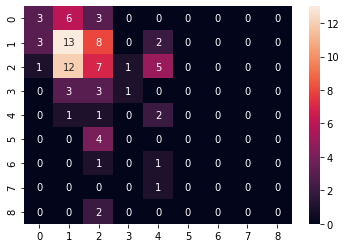


 SVM

Accuracy: 0.392857
Precision: 0.086829
Recall: 0.141026
F1 score: 0.298776

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


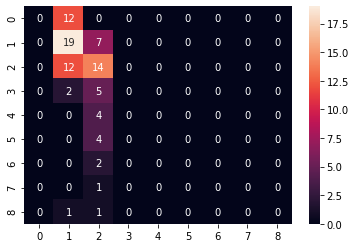


 RF

Accuracy: 0.750000
Precision: 0.478901
Recall: 0.430495
F1 score: 0.732759

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


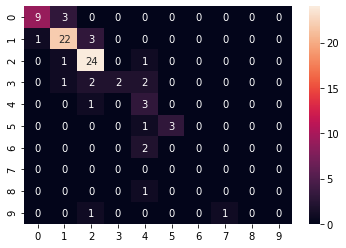


 DT

Accuracy: 0.642857
Precision: 0.329431
Recall: 0.368773
F1 score: 0.638847

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


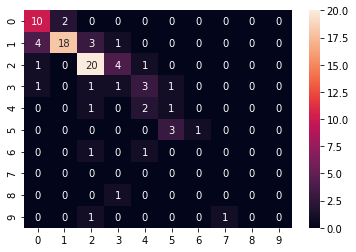


 NB

Accuracy: 0.511905
Precision: 0.375922
Recall: 0.389744
F1 score: 0.493768

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


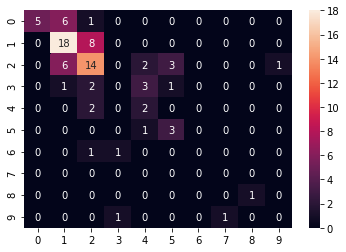



Fold : 2 


 KNN

Accuracy: 0.345238
Precision: 0.186845
Recall: 0.174744
F1 score: 0.313781

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


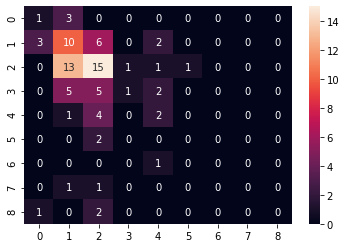


 SVM

Accuracy: 0.392857
Precision: 0.087566
Recall: 0.140468
F1 score: 0.302931

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


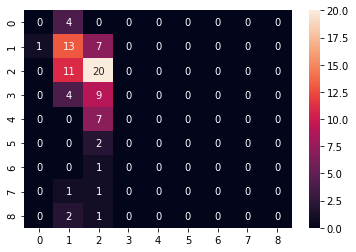


 RF

Accuracy: 0.642857
Precision: 0.351633
Recall: 0.326663
F1 score: 0.610923

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


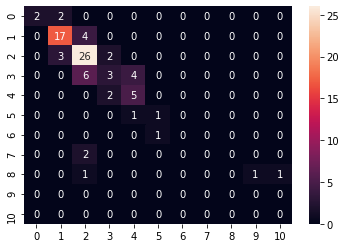


 DT

Accuracy: 0.630952
Precision: 0.460556
Recall: 0.494952
F1 score: 0.625141

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


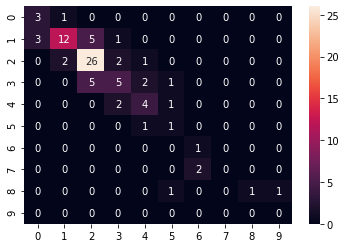


 NB

Accuracy: 0.404762
Precision: 0.253968
Recall: 0.276418
F1 score: 0.403995

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


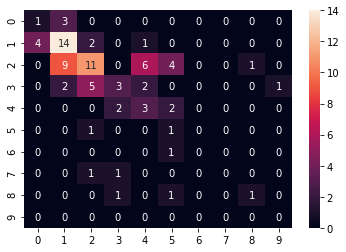



Fold : 3 


 KNN

Accuracy: 0.369048
Precision: 0.246671
Recall: 0.187047
F1 score: 0.358813

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


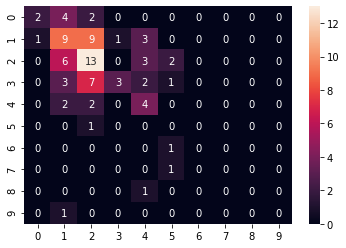


 SVM

Accuracy: 0.297619
Precision: 0.109436
Recall: 0.114493
F1 score: 0.227903

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


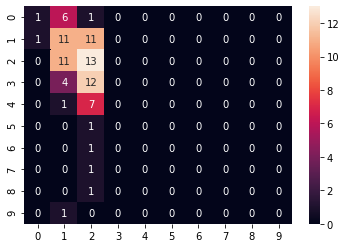


 RF

Accuracy: 0.690476
Precision: 0.398359
Recall: 0.350996
F1 score: 0.666732

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


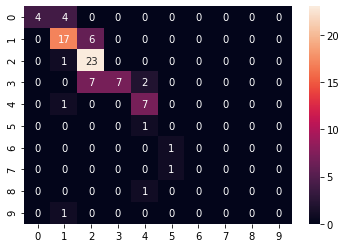


 DT

Accuracy: 0.595238
Precision: 0.298368
Recall: 0.268116
F1 score: 0.592943

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


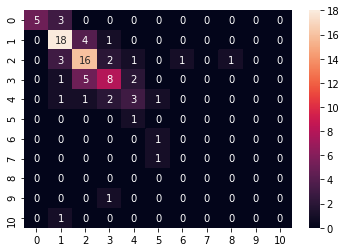


 NB

Accuracy: 0.369048
Precision: 0.214079
Recall: 0.257493
F1 score: 0.371230

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


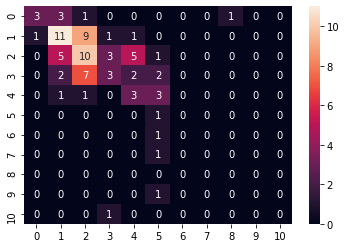



Fold : 4 


 KNN

Accuracy: 0.357143
Precision: 0.210632
Recall: 0.215142
F1 score: 0.313116

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


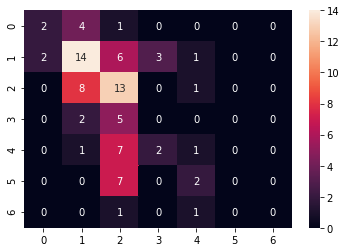


 SVM

Accuracy: 0.357143
Precision: 0.244637
Recall: 0.206650
F1 score: 0.290507

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


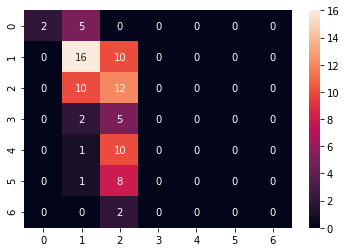


 RF

Accuracy: 0.666667
Precision: 0.514824
Recall: 0.526640
F1 score: 0.644115

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


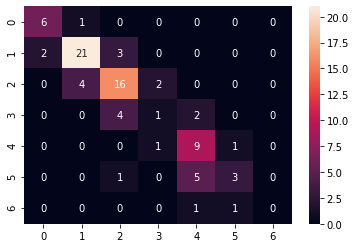


 DT

Accuracy: 0.642857
Precision: 0.458563
Recall: 0.461088
F1 score: 0.641105

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


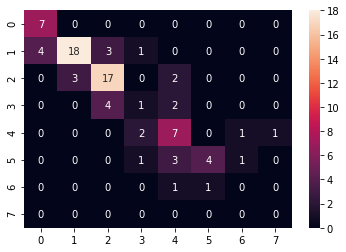


 NB

Accuracy: 0.476190
Precision: 0.363139
Recall: 0.316101
F1 score: 0.472417

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


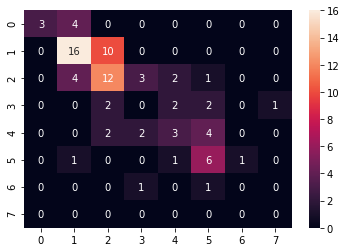



Fold : 5 


 KNN

Accuracy: 0.373494
Precision: 0.229821
Recall: 0.162130
F1 score: 0.341572

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


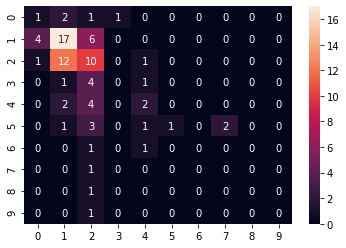


 SVM

Accuracy: 0.385542
Precision: 0.081111
Recall: 0.125000
F1 score: 0.303225

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


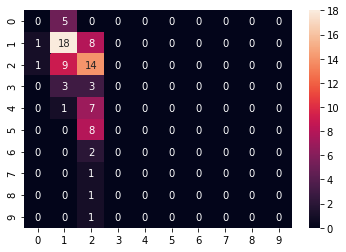


 RF

Accuracy: 0.614458
Precision: 0.361765
Recall: 0.296944
F1 score: 0.592339

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


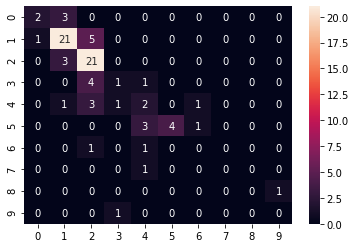


 DT

Accuracy: 0.506024
Precision: 0.341525
Recall: 0.268704
F1 score: 0.497391

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


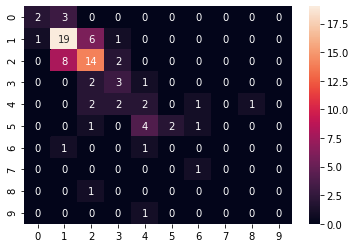


 NB

Accuracy: 0.554217
Precision: 0.283584
Recall: 0.258923
F1 score: 0.535509

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


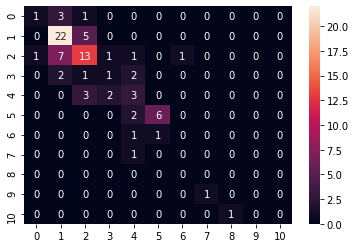



Fold : 6 


 KNN

Accuracy: 0.445783
Precision: 0.226977
Recall: 0.213318
F1 score: 0.402797

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


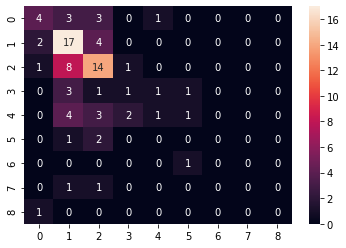


 SVM

Accuracy: 0.397590
Precision: 0.159652
Recall: 0.167344
F1 score: 0.312061

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


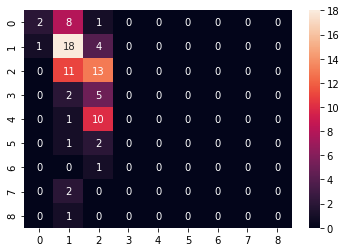


 RF

Accuracy: 0.771084
Precision: 0.485990
Recall: 0.460378
F1 score: 0.745563

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


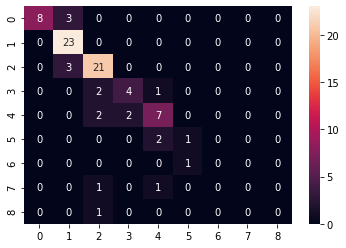


 DT

Accuracy: 0.674699
Precision: 0.548200
Recall: 0.500268
F1 score: 0.668273

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


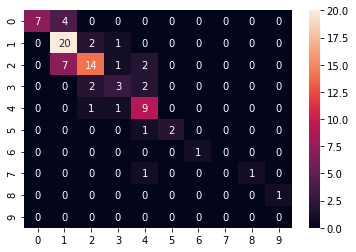


 NB

Accuracy: 0.578313
Precision: 0.344699
Recall: 0.361686
F1 score: 0.557964

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


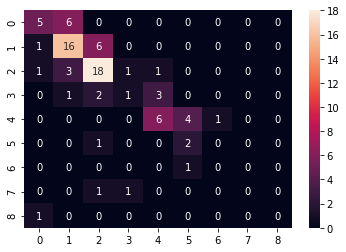



Fold : 7 


 KNN

Accuracy: 0.373494
Precision: 0.239719
Recall: 0.236099
F1 score: 0.358016

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


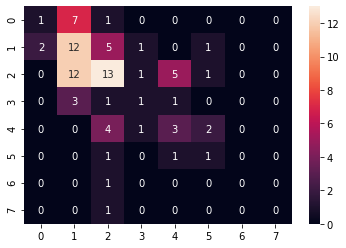


 SVM

Accuracy: 0.493976
Precision: 0.205044
Recall: 0.216952
F1 score: 0.409346

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


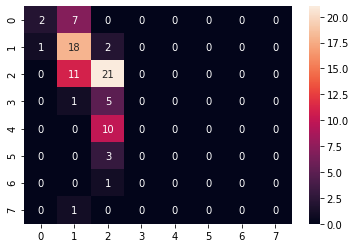


 RF

Accuracy: 0.759036
Precision: 0.715278
Recall: 0.654874
F1 score: 0.753809

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


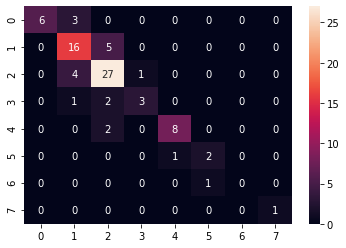


 DT

Accuracy: 0.698795
Precision: 0.551866
Recall: 0.567449
F1 score: 0.698601

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


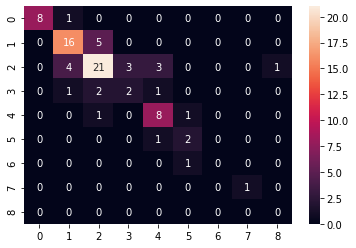


 NB

Accuracy: 0.385542
Precision: 0.360148
Recall: 0.379343
F1 score: 0.393834

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


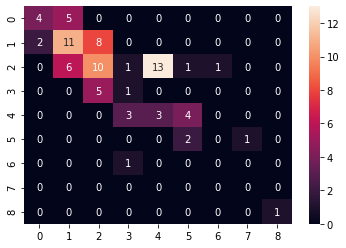



Fold : 8 


 KNN

Accuracy: 0.397590
Precision: 0.254505
Recall: 0.242857
F1 score: 0.379066

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


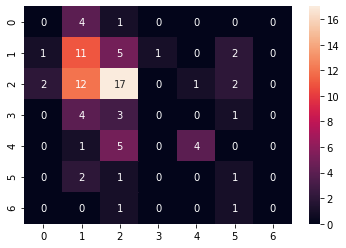


 SVM

Accuracy: 0.385542
Precision: 0.110420
Recall: 0.172689
F1 score: 0.308600

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


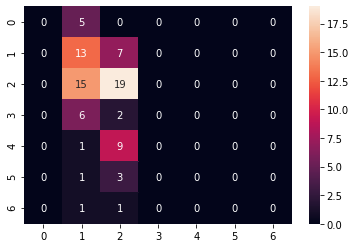


 RF

Accuracy: 0.746988
Precision: 0.651941
Recall: 0.578992
F1 score: 0.726895

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


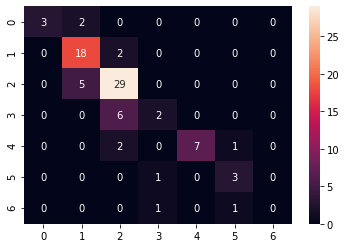


 DT

Accuracy: 0.638554
Precision: 0.482576
Recall: 0.463235
F1 score: 0.644178

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


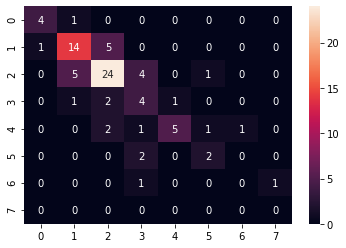


 NB

Accuracy: 0.506024
Precision: 0.406344
Recall: 0.356801
F1 score: 0.502582

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


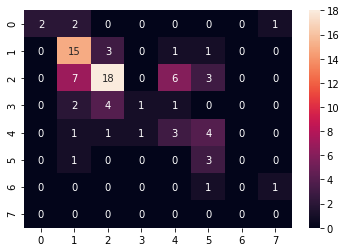



Fold : 9 


 KNN

Accuracy: 0.301205
Precision: 0.147641
Recall: 0.166667
F1 score: 0.269539

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


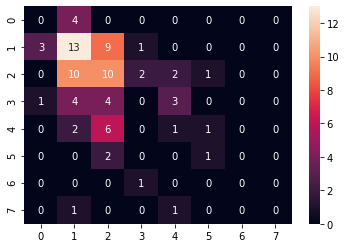


 SVM

Accuracy: 0.409639
Precision: 0.104167
Recall: 0.166154
F1 score: 0.315727

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


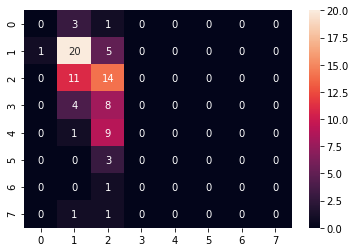


 RF

Accuracy: 0.542169
Precision: 0.384295
Recall: 0.330798
F1 score: 0.528729

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


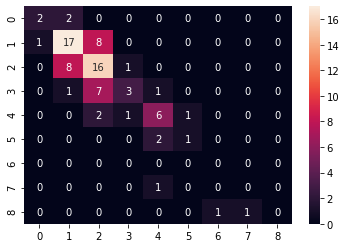


 DT

Accuracy: 0.518072
Precision: 0.326759
Recall: 0.310872
F1 score: 0.514362

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


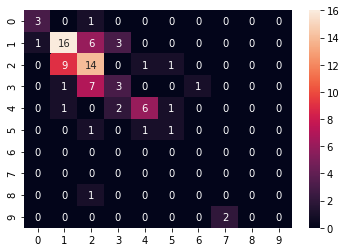


 NB

Accuracy: 0.506024
Precision: 0.427976
Recall: 0.409071
F1 score: 0.478641

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


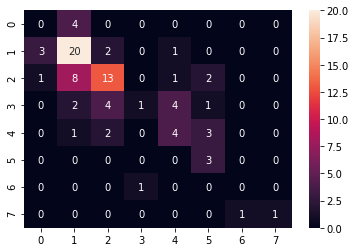



Fold : 10 


 KNN

Accuracy: 0.373494
Precision: 0.188597
Recall: 0.178889
F1 score: 0.348432

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


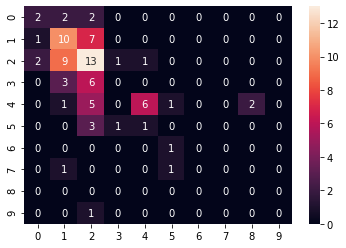


 SVM

Accuracy: 0.337349
Precision: 0.185529
Recall: 0.156695
F1 score: 0.248011

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


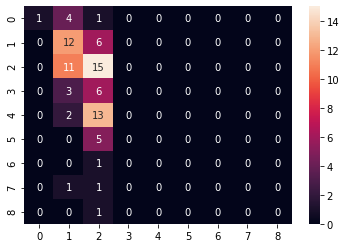


 RF

Accuracy: 0.602410
Precision: 0.354434
Recall: 0.326239
F1 score: 0.567861

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


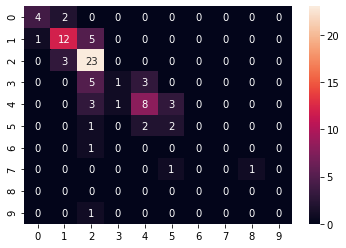


 DT

Accuracy: 0.578313
Precision: 0.329904
Recall: 0.314452
F1 score: 0.583988

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


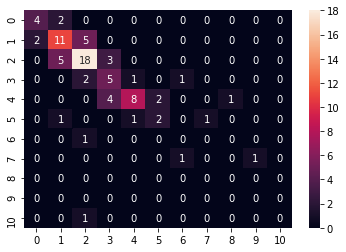


 NB

Accuracy: 0.397590
Precision: 0.238014
Recall: 0.255556
F1 score: 0.365427

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


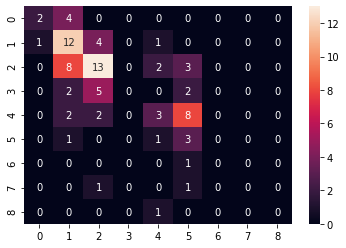

In [70]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold       
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA     

acc_knn = []
acc_rf = []
acc_svm = []
acc_dt = []
acc_nb = []

kf = KFold(n_splits=10)       #10 katlı çapraz geçerleme 
kf.get_n_splits(X)

i = 1
for train_index,test_index in kf.split(X):            #Dataset kesitlere bölünür ve sınıflandırma yapılır.
    print("\n")
    print(f"Fold : {i} \n")
    #print("Train:",train_index, "Test:", test_index)       
    i = i +1
    X_train = X.iloc[train_index]                     #belirlenen kesitlerin indislere göre train ve test setleri oluşturulur.                                         
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]  
                  
    KNN.fit(X_train, y_train)                        # .fit() fonksiyonu ile training set üzerinden eğitimler tamamlanır. 
    y_pred = KNN.predict(X_test)                     # .predict() fonksiyonu ile test set üzerinden tahminleme yapılır. 
    print("\n KNN")
    acc_knn.append(get_metrics(y_test, y_pred))                      # başarı ölçüm metrikleri hesaplanır.

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    print("\n SVM")
    acc_svm.append(get_metrics(y_test, y_pred))

    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print("\n RF")
    acc_rf.append(get_metrics(y_test, y_pred))

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("\n DT")
    acc_dt.append(get_metrics(y_test, y_pred))

    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    print("\n NB")
    acc_nb.append(get_metrics(y_test, y_pred))

In [71]:
print(str(acc_knn))
print(acc_svm)
print(acc_rf)
print(acc_dt)
print(acc_nb)

[0.30952380952380953, 0.34523809523809523, 0.36904761904761907, 0.35714285714285715, 0.37349397590361444, 0.4457831325301205, 0.37349397590361444, 0.39759036144578314, 0.30120481927710846, 0.37349397590361444]
[0.39285714285714285, 0.39285714285714285, 0.2976190476190476, 0.35714285714285715, 0.3855421686746988, 0.39759036144578314, 0.4939759036144578, 0.3855421686746988, 0.40963855421686746, 0.3373493975903614]
[0.75, 0.6428571428571429, 0.6904761904761905, 0.6666666666666666, 0.6144578313253012, 0.7710843373493976, 0.7590361445783133, 0.7469879518072289, 0.5421686746987951, 0.6024096385542169]
[0.6428571428571429, 0.6309523809523809, 0.5952380952380952, 0.6428571428571429, 0.5060240963855421, 0.6746987951807228, 0.6987951807228916, 0.6385542168674698, 0.5180722891566265, 0.5783132530120482]
[0.5119047619047619, 0.40476190476190477, 0.36904761904761907, 0.47619047619047616, 0.5542168674698795, 0.5783132530120482, 0.3855421686746988, 0.5060240963855421, 0.5060240963855421, 0.3975903614


 KNN

Accuracy: 0.469880
Precision: 0.298677
Recall: 0.284995
F1 score: 0.447692

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


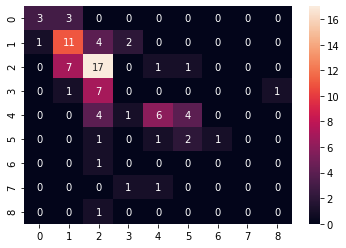


 SVM

Accuracy: 0.530120
Precision: 0.253495
Recall: 0.270655
F1 score: 0.462131

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


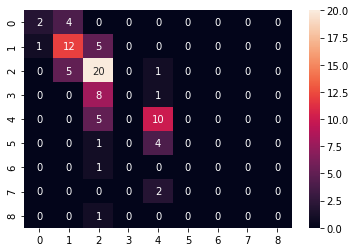


 RF

Accuracy: 0.445783
Precision: 0.208470
Recall: 0.196270
F1 score: 0.415517

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


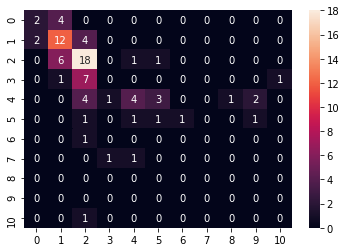


 DT

Accuracy: 0.385542
Precision: 0.184201
Recall: 0.163818
F1 score: 0.367841

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


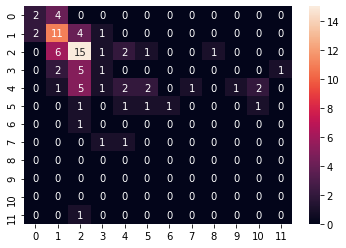


 NB

Accuracy: 0.506024
Precision: 0.215537
Recall: 0.261443
F1 score: 0.439916

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


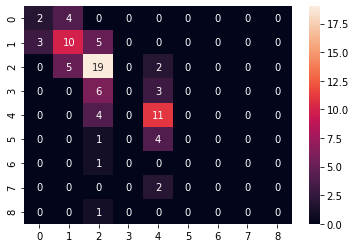

0.5060240963855421

In [72]:
sc = StandardScaler()                           # normalizasyon işlemleri yapılır.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)                       #Linear discriminant analysis uygulanır ve sınıflandırma yapılır.          
X_train = lda.fit_transform(X_train, y_train) 
X_test = lda.transform(X_test)


KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print("\n KNN")
get_metrics(y_test, y_pred)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\n SVM")
get_metrics(y_test, y_pred)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("\n RF")
get_metrics(y_test, y_pred)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("\n DT")
get_metrics(y_test, y_pred)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print("\n NB")
get_metrics(y_test, y_pred)

Feature 0  Marka: 0.107362
Feature 1  Model: 0.389948
Feature 2  Model Yılı: 0.312574
Feature 3  Km: 0.234289
Feature 4  Şanzıman Türü: 0.311456
Feature 5  Yakıt Türü: 0.109004
Feature 6  Renk: 0.000000
Feature 7  Motor Gücü: 0.290210
Feature 8  Silindir Hacmi: 0.315237
Feature 9  Ağırlık: 0.406189
Feature 10  Kasa Cins Tipi: 0.119976
Feature 11  Araç Cinsi: 0.113384
Feature 12  Araç Tipi: 0.097851


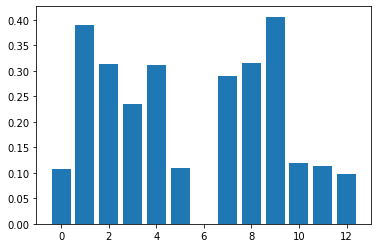

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

#Information Gain değerleri kullanılarak feature selection işlemleri gerçekleştirilir.

def select_features(X_train, y_train):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')     #mutual_info_classif fonksiyonu ile ingo gain değerleri hesaplanır.
	fs.fit(X_train, y_train)
	return fs                                                    # her özelliğin information gain sonuçları döndürülür
  
fs = select_features(X,y)
for i in range(len(fs.scores_)):
  print('Feature %d  %s: %f' % (i , X.columns.tolist()[i], fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()



Fold : 1 


 KNN

Accuracy: 0.309524
Precision: 0.191466
Recall: 0.184676
F1 score: 0.287046

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


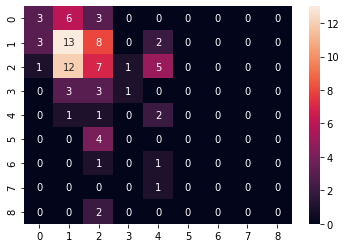


 SVM

Accuracy: 0.392857
Precision: 0.086829
Recall: 0.141026
F1 score: 0.298776

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


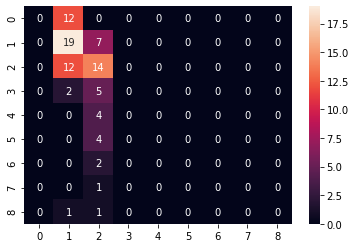


 RF

Accuracy: 0.726190
Precision: 0.427463
Recall: 0.434707
F1 score: 0.713548

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


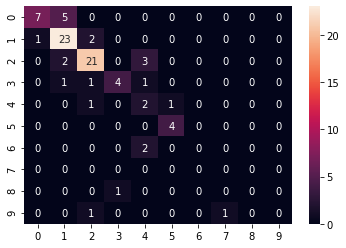


 DT

Accuracy: 0.654762
Precision: 0.360007
Recall: 0.393773
F1 score: 0.637838

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


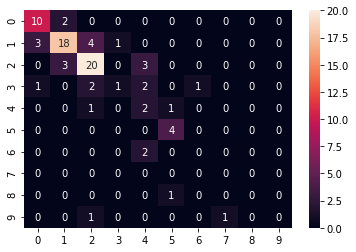


 NB

Accuracy: 0.511905
Precision: 0.386941
Recall: 0.410897
F1 score: 0.493148

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


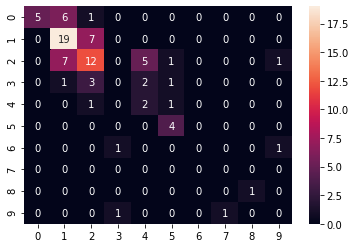



Fold : 2 


 KNN

Accuracy: 0.345238
Precision: 0.186845
Recall: 0.174744
F1 score: 0.313781

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


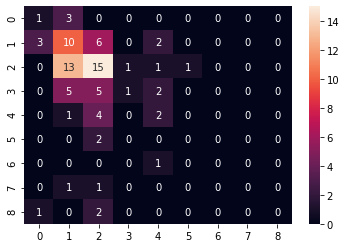


 SVM

Accuracy: 0.392857
Precision: 0.087405
Recall: 0.140468
F1 score: 0.303290

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


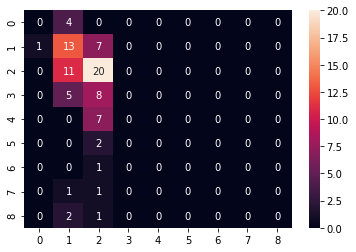


 RF

Accuracy: 0.654762
Precision: 0.463675
Recall: 0.383484
F1 score: 0.619786

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


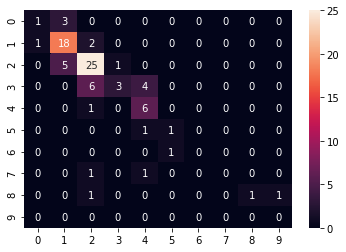


 DT

Accuracy: 0.630952
Precision: 0.550980
Recall: 0.512014
F1 score: 0.628195

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


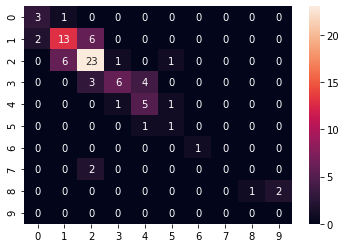


 NB

Accuracy: 0.380952
Precision: 0.219974
Recall: 0.267837
F1 score: 0.376188

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


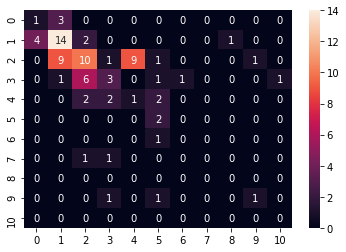



Fold : 3 


 KNN

Accuracy: 0.369048
Precision: 0.246671
Recall: 0.187047
F1 score: 0.358813

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


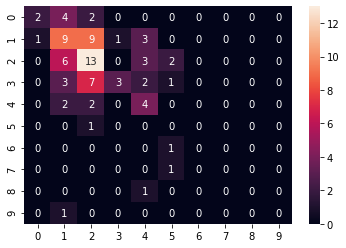


 SVM

Accuracy: 0.297619
Precision: 0.109436
Recall: 0.114493
F1 score: 0.227903

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


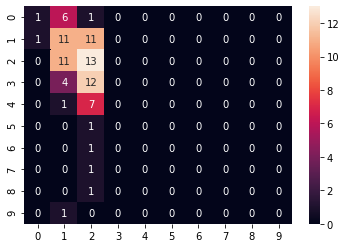


 RF

Accuracy: 0.654762
Precision: 0.405577
Recall: 0.433786
F1 score: 0.634360

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


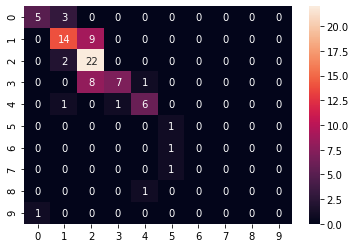


 DT

Accuracy: 0.607143
Precision: 0.348746
Recall: 0.379364
F1 score: 0.604336

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


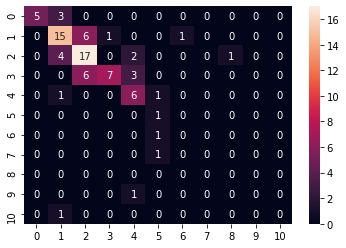


 NB

Accuracy: 0.404762
Precision: 0.203273
Recall: 0.252141
F1 score: 0.391537

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


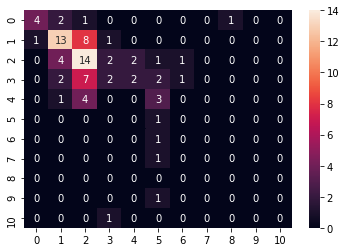



Fold : 4 


 KNN

Accuracy: 0.357143
Precision: 0.210632
Recall: 0.215142
F1 score: 0.313116

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


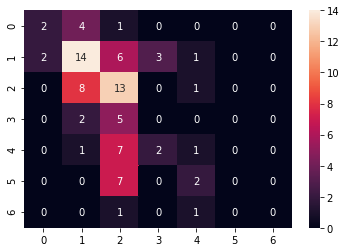


 SVM

Accuracy: 0.357143
Precision: 0.244637
Recall: 0.206650
F1 score: 0.290507

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


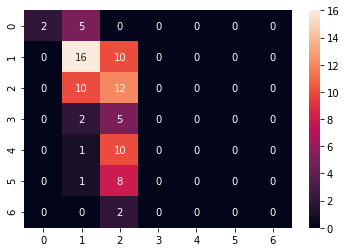


 RF

Accuracy: 0.666667
Precision: 0.522179
Recall: 0.528638
F1 score: 0.644845

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


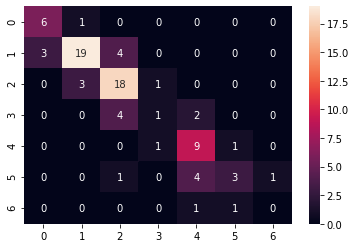


 DT

Accuracy: 0.595238
Precision: 0.376690
Recall: 0.372313
F1 score: 0.594036

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


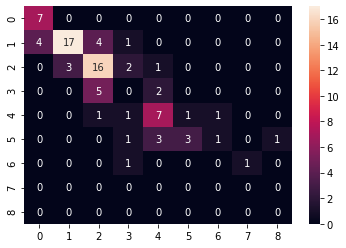


 NB

Accuracy: 0.464286
Precision: 0.314643
Recall: 0.288218
F1 score: 0.465690

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


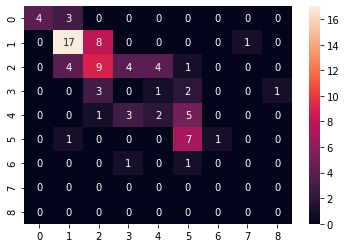



Fold : 5 


 KNN

Accuracy: 0.373494
Precision: 0.229821
Recall: 0.162130
F1 score: 0.341572

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


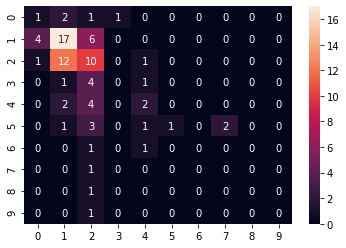


 SVM

Accuracy: 0.397590
Precision: 0.082234
Recall: 0.128241
F1 score: 0.311062

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


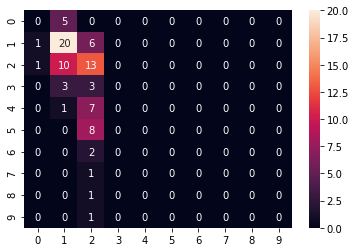


 RF

Accuracy: 0.554217
Precision: 0.361411
Recall: 0.292407
F1 score: 0.544171

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


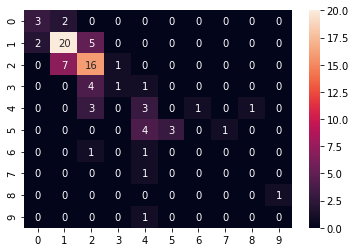


 DT

Accuracy: 0.481928
Precision: 0.325275
Recall: 0.240833
F1 score: 0.475721

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


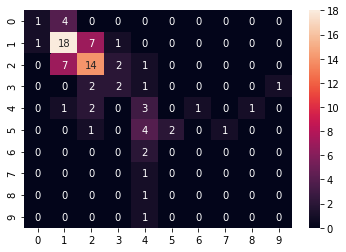


 NB

Accuracy: 0.481928
Precision: 0.197748
Recall: 0.192593
F1 score: 0.460716

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


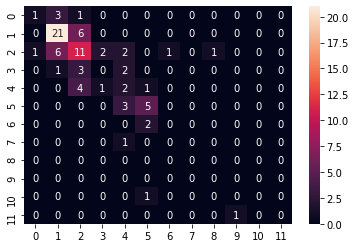



Fold : 6 


 KNN

Accuracy: 0.445783
Precision: 0.226977
Recall: 0.213318
F1 score: 0.402797

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


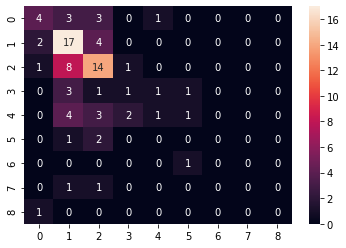


 SVM

Accuracy: 0.397590
Precision: 0.159652
Recall: 0.167344
F1 score: 0.312061

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


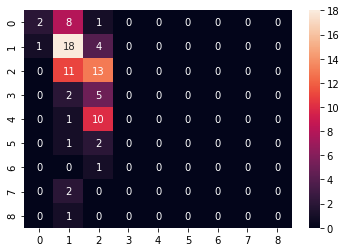


 RF

Accuracy: 0.746988
Precision: 0.470724
Recall: 0.390963
F1 score: 0.727677

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


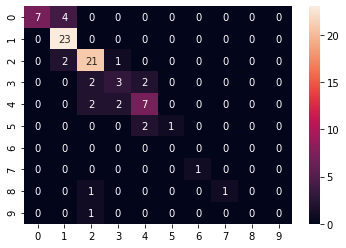


 DT

Accuracy: 0.650602
Precision: 0.554638
Recall: 0.547196
F1 score: 0.642377

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


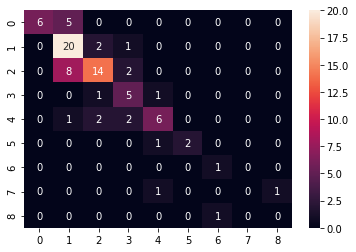


 NB

Accuracy: 0.542169
Precision: 0.328156
Recall: 0.337056
F1 score: 0.515752

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


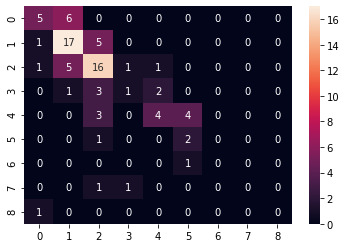



Fold : 7 


 KNN

Accuracy: 0.373494
Precision: 0.239719
Recall: 0.236099
F1 score: 0.358016

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


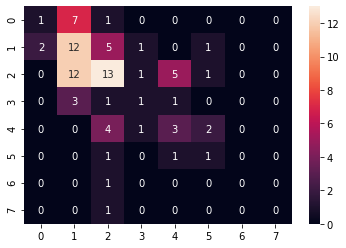


 SVM

Accuracy: 0.493976
Precision: 0.205044
Recall: 0.216952
F1 score: 0.409346

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


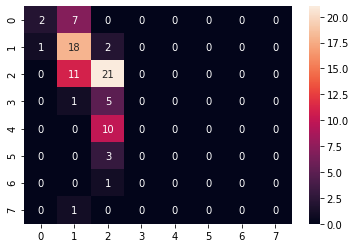


 RF

Accuracy: 0.698795
Precision: 0.648494
Recall: 0.624045
F1 score: 0.697011

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


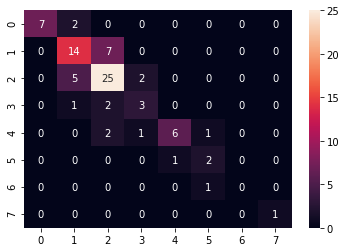


 DT

Accuracy: 0.614458
Precision: 0.541103
Recall: 0.572830
F1 score: 0.618051

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


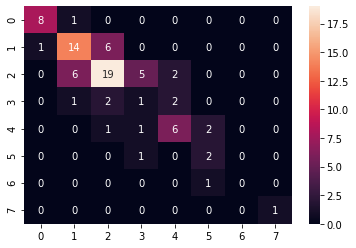


 NB

Accuracy: 0.409639
Precision: 0.381314
Recall: 0.412257
F1 score: 0.406467

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


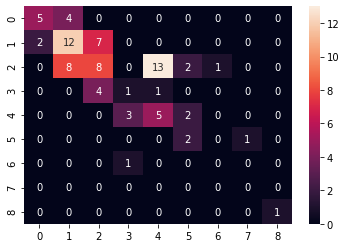



Fold : 8 


 KNN

Accuracy: 0.397590
Precision: 0.254505
Recall: 0.242857
F1 score: 0.379066

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


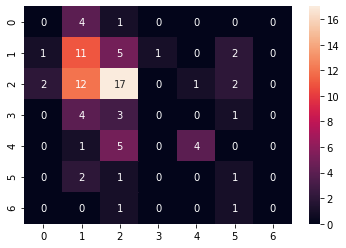


 SVM

Accuracy: 0.385542
Precision: 0.110420
Recall: 0.172689
F1 score: 0.308600

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


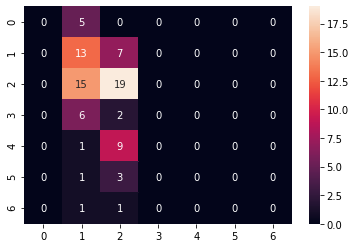


 RF

Accuracy: 0.722892
Precision: 0.654945
Recall: 0.578361
F1 score: 0.710505

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


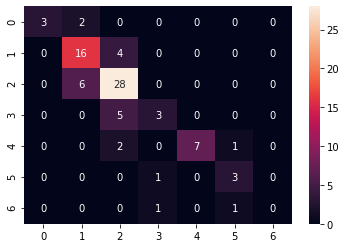


 DT

Accuracy: 0.650602
Precision: 0.451395
Recall: 0.434804
F1 score: 0.651770

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


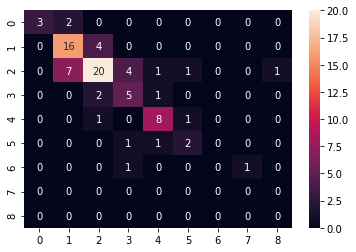


 NB

Accuracy: 0.481928
Precision: 0.418941
Recall: 0.396429
F1 score: 0.465611

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


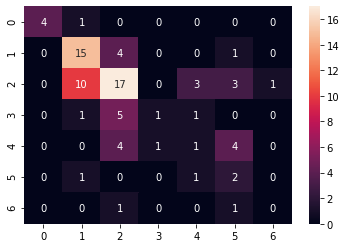



Fold : 9 


 KNN

Accuracy: 0.301205
Precision: 0.147641
Recall: 0.166667
F1 score: 0.269539

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


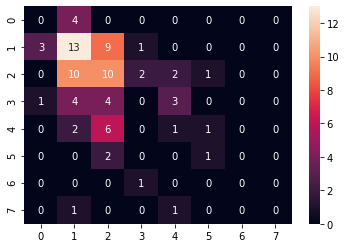


 SVM

Accuracy: 0.409639
Precision: 0.104167
Recall: 0.166154
F1 score: 0.315727

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


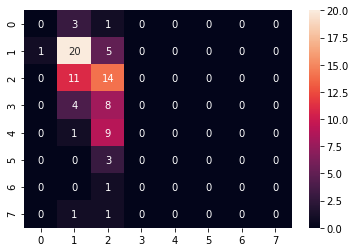


 RF

Accuracy: 0.506024
Precision: 0.367450
Recall: 0.275413
F1 score: 0.472395

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


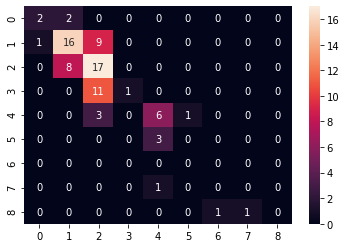


 DT

Accuracy: 0.578313
Precision: 0.312244
Recall: 0.288410
F1 score: 0.571927

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


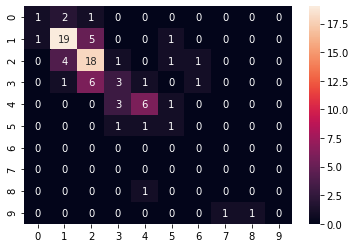


 NB

Accuracy: 0.506024
Precision: 0.289373
Recall: 0.314712
F1 score: 0.473097

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


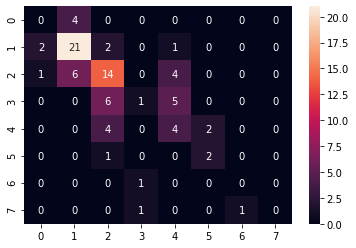



Fold : 10 


 KNN

Accuracy: 0.373494
Precision: 0.188597
Recall: 0.178889
F1 score: 0.348432

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


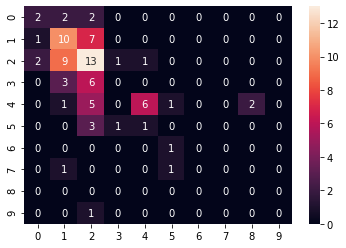


 SVM

Accuracy: 0.337349
Precision: 0.185529
Recall: 0.156695
F1 score: 0.248011

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


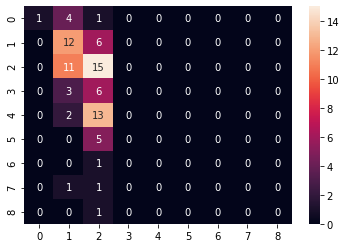


 RF

Accuracy: 0.602410
Precision: 0.347932
Recall: 0.358034
F1 score: 0.580374

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


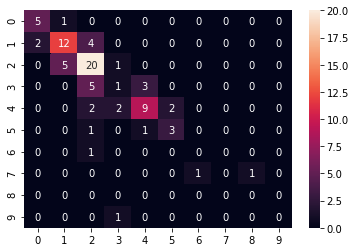


 DT

Accuracy: 0.566265
Precision: 0.389631
Recall: 0.374188
F1 score: 0.562630

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


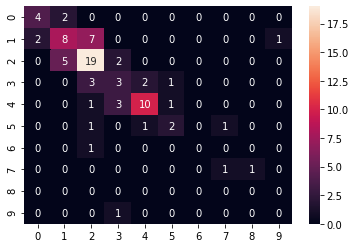


 NB

Accuracy: 0.385542
Precision: 0.224619
Recall: 0.250047
F1 score: 0.343236

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


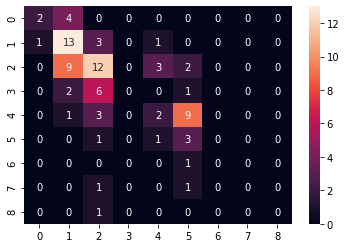

In [74]:
#Feature selection işlemleri sonucunda ayırt ediciliği düşük alanlar elenir ve yeniden sınfılandırma sonuçları incelenir.
y = df["Fiyat Aralık"]
deneme_X = df.drop(["Marka", "Yakıt Türü", "Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi", "Fiyat Aralık"], axis = 'columns')

kf = KFold(n_splits=10)
kf.get_n_splits(X)


acc_knn_if = []
acc_rf_if = []
acc_svm_if = []
acc_dt_if = []
acc_nb_if = []

i = 1
for train_index,test_index in kf.split(X):
    print("\n")
    print(f"Fold : {i} \n")
    i = i +1
    X_train = deneme_X.iloc[train_index]                           
    X_test = deneme_X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]  

    KNN.fit(X_train, y_train)                        # .fit() fonksiyonu ile training set üzerinden eğitimler tamamlanır. 
    y_pred = KNN.predict(X_test)                     # .predict() fonksiyonu ile test set üzerinden tahminleme yapılır. 
    print("\n KNN")
    acc_knn_if.append(get_metrics(y_test, y_pred))                      # başarı ölçüm metrikleri hesaplanır.

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    print("\n SVM")
    acc_svm_if.append(get_metrics(y_test, y_pred))

    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print("\n RF")
    acc_rf_if.append(get_metrics(y_test, y_pred))

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("\n DT")
    acc_dt_if.append(get_metrics(y_test, y_pred))

    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    print("\n NB")
    acc_nb_if.append(get_metrics(y_test, y_pred))

In [75]:
import scipy.stats as stats

t_stat, p = stats.ttest_ind(acc_knn, acc_svm)
print(f" KNN vs SVM : t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_knn, acc_rf)
print(f" KNN vs RF :  t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_knn, acc_dt)
print(f" KNN vs DT :  t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_knn, acc_nb)
print(f" KNN vs NB : t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_rf, acc_dt)


print(f" RF vs  SVM : t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_rf, acc_svm)
print(f" RF vs DT :  t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_rf, acc_dt)
print(f" RF vs NB :  t_stat : {t_stat}, p: {p}")


t_stat, p = stats.ttest_ind(acc_svm, acc_nb)
print(f" SVM vs NB :  t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_svm, acc_dt)
print(f" SVM vs DT :  t_stat : {t_stat}, p: {p}")
t_stat, p = stats.ttest_ind(acc_svm, acc_nb)

t_stat, p = stats.ttest_ind(acc_dt, acc_nb)
print(f" DT vs NB :  t_stat : {t_stat}, p: {p}")

 KNN vs SVM : t_stat : -0.9821586768097027, p: 0.3390396862858167
 KNN vs RF :  t_stat : -11.234607502116079, p: 1.447091650758227e-09
 KNN vs DT :  t_stat : -10.387302828100665, p: 4.960941844084407e-09
 KNN vs NB : t_stat : -3.87003854903973, p: 0.0011218773623989007
 RF vs  SVM : t_stat : 2.0773155334477567, p: 0.052361898725085634
 RF vs DT :  t_stat : 9.951576151216774, p: 9.623161598554235e-09
 RF vs NB :  t_stat : 2.0773155334477567, p: 0.052361898725085634
 SVM vs NB :  t_stat : -2.93815391679632, p: 0.008789359397911414
 SVM vs DT :  t_stat : -8.864341606805603, p: 5.5184706221603506e-08
 DT vs NB :  t_stat : 4.649876620558411, p: 0.0001991840527096529
